# 第8回演習「賞味期限切れのおやつを判別する」

この演習ではベイズの定理を用いたプログラムの記述方法を習得します。<hr />

## 【例題】
ケメ子さんの前にはクッキーが入った入れ物が2つあります。2つの入れ物には見た目での違いはありません。また「入れ物1のクッキー」と「入れ物2のクッキー」にも、見た目での違いはありません。

<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week8/cookies.png" style="width:300px">

しかし、両者には重要な違いがあります。入れ物1のクッキーは全て賞味期限が切れていて、たくさん食べるとお腹を壊してしまうのです。

<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week8/hunger-413685__340.jpg" style="width:300px">

ケメ子さんはどちらか1つの入れ物を選び、中のクッキーが賞味期限切れかどうかを判別しないといけません。
(何の罰ゲームでしょうか!?)

腹を壊したくないケメ子さんにとっての唯一の手掛かりは、2つの入れ物に入っているクッキーの種別だけです。入れ物1のほうが、バニラの割合が高くなっています。


<table border="1" style="margin-left: auto;margin-right: auto">
    <tr><th></th><th>入れ物1</th><th>入れ物2</th></tr>
    <tr><th>バニラ</th><td>30個</td><td>20個</td></tr>
    <tr><th>チョコレイト</th><td>10個</td><td>20個</td></tr>
</table> 

ケメ子さんは入れ物を1つランダムに選び、
* 中からクッキーを1枚取り出す
* ニオイでクッキーの味を判別する(バニラかチョコレイトのどちらか)
* クッキーを入れ物に戻す

を3回繰り返しました。それぞれの味は
「バニラ、バニラ、チョコレイト」でした。

<img src="http://pfe.p.cyber-u.ac.jp/img/Python/Week8/VVC.png" style="width:300px">

この状況のもとで、ケメ子さんの手元にある入れ物が入れ物1 (すなわち、賞味期限切れ) である確率はいくらでしょうか?

入れ物は2つの中からランダムに選ぶので、確率はどちらも等しく 0.5 です。
$$
\\
p(入れ物1)=0.5
\\
p(入れ物2)=0.5
$$

In [ ]:
確率['入れ物1']=0.5 # 事前確率の辞書オブジェクト p(入れ物1)
確率['入れ物2']=0.5 # 事前確率の辞書オブジェクト p(入れ物2)

In [ ]:
確率['入れ物1'] = 0.5 # 事前確率の辞書オブジェクト p(入れ物1)
確率['入れ物2'] = 0.5 # 事前確率の辞書オブジェクト p(入れ物2)

ベイズの定理を見直し…
$$
p(A|B)=\frac{p(A)p(B|A)}{p(B)}\\
$$

尤度を設定します。
$$
p(バニラ|入れ物1)=0.75\\
p(バニラ|入れ物2)=0.5\\
p(チョコレイト|入れ物1)=0.25\\
p(チョコレイト|入れ物2)=0.5\\
$$

In [ ]:
# 尤度は2次元の辞書オブジェクトで表す
尤度['バニラ']['入れ物1'] = 0.75 # 入れ物1からバニラが出る確率
尤度['バニラ']['入れ物2'] = 0.5 # 入れ物2からバニラが出る確率
尤度['チョコレイト']['入れ物1'] = 0.25 # 入れ物1からチョコレイトが出る確率 
尤度['チョコレイト']['入れ物2'] = 0.5 # 入れ物2からチョコレイトが出る確率

次に、確率を更新する関数と正規化する関数を定義します。更新とは、新たに得た情報(例えば、ケメ子さんが取り出したクッキーがバニラ味だった)に基づいて入れ物の確率を更新することです。クッキーを取り出す前は入れ物1、入れ物2はどちらも確率が0.5でしたが、中から1枚取り出したクッキーが「バニラ」だったなら
* 入れ物1の確率は0.5よりも上になる
* 入れ物2の確率は0.5よりも下になる

として更新されるでしょう。正規化とは、入れ物1と入れ物2の確率の合計が1となるように調整することです。

あとは、これらの2つの関数を呼び出すだけです。中でやっているのは基本的に足し算、掛け算、割り算だけです。

In [ ]:
def 更新(入れ物,この尤度): # ベイズ更新の関数
  確率[入れ物]=確率[入れ物]*この尤度

def 正規化(): # 確率の総和が1になるように正規化する関数
  合計=0
  for この入れ物 in 確率:
    合計=合計+確率[この入れ物]
  for この入れ物 in 確率:
    確率[この入れ物]=確率[この入れ物]/合計

# 更新する前、すなわち「クッキーを取り出す前」の入れ物1の確率
print("取り出す前の入れ物1の確率: "+str(確率['入れ物1'])) 

更新('入れ物1',尤度['バニラ']['入れ物1']) # 取り出したらバニラだった
更新('入れ物2',尤度['バニラ']['入れ物2']) # 取り出したらバニラだった
正規化()

# クッキーを取り出した後の入れ物1の確率を出力
print("取り出した後の入れ物1の確率: "+str(確率['入れ物1'])) 

ここまでのプログラムを一つにまとめます。

取り出す前の入れ物1の確率: 0.5
取り出す前の入れ物2の確率: 0.5
取り出した後の入れ物1の確率: 0.9192938209331651
取り出した後の入れ物2の確率: 0.08070617906683483


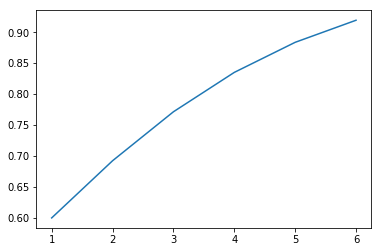

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
確率={}
尤度={}
尤度['バニラ']={}
尤度['チョコレイト']={}

確率['入れ物1']=0.5 # 事前確率の辞書オブジェクト p(入れ物1)
確率['入れ物2']=0.5 # 事前確率の辞書オブジェクト p(入れ物2)

# 尤度は2次元の辞書オブジェクトで表す
尤度['バニラ']['入れ物1'] = 0.75 # 入れ物1からバニラが出る確率
尤度['バニラ']['入れ物2'] = 0.5 # 入れ物2からバニラが出る確率
尤度['チョコレイト']['入れ物1'] = 0.25 # 入れ物1からチョコレイトが出る確率 
尤度['チョコレイト']['入れ物2'] = 0.5 # 入れ物2からチョコレイトが出る確率

def 更新(入れ物,この尤度): # ベイズ更新の関数
  確率[入れ物]=確率[入れ物]*この尤度

def 正規化(): # 確率の総和が1になるように正規化する関数
  合計=0
  for この入れ物 in 確率:
    合計=合計+確率[この入れ物]
  for この入れ物 in 確率:
    確率[この入れ物]=確率[この入れ物]/合計

# 更新する前、すなわち「クッキーを取り出す前」の入れ物1の確率
print("取り出す前の入れ物1の確率: "+str(確率['入れ物1'])) 
print("取り出す前の入れ物2の確率: "+str(確率['入れ物2'])) 


# 更新('入れ物1',尤度['バニラ']['入れ物1']) # 取り出したらバニラだった
# 更新('入れ物1',尤度['バニラ']['入れ物1']) # 取り出したらバニラだった
# 更新('入れ物1',尤度['チョコレイト']['入れ物1']) # 取り出したらバニラだった
# 更新('入れ物2',尤度['バニラ']['入れ物2']) # 取り出したらバニラだった
# 更新('入れ物2',尤度['バニラ']['入れ物2']) # 取り出したらバニラだった
# 更新('入れ物2',尤度['チョコレイト']['入れ物2']) # 取り出したらバニラだった
# 正規化()
グラフ用確率リストx = []
グラフ用確率リストy = []
i=1
while 確率['入れ物1'] < 0.9:
    更新('入れ物1',尤度['バニラ']['入れ物1']) # 取り出したらバニラだった
    更新('入れ物2',尤度['バニラ']['入れ物2']) # 取り出したらバニラだった
    正規化()
    グラフ用確率リストx.append(i)
    i+=1
#     print(i)
    グラフ用確率リストy.append(確率['入れ物1'])

print("取り出した後の入れ物1の確率: "+str(確率['入れ物1'])) # ベイズ更新後のボウル1の確率
print("取り出した後の入れ物2の確率: "+str(確率['入れ物2'])) # ベイズ更新後のボウル1の確率


######## ↑任意課題のプログラムはこのあたりで書きましょう
plt.plot(グラフ用確率リストx,グラフ用確率リストy)

上記の出力結果により

* ランダムに選んだ入れ物から**1枚クッキー**を取り出して
* それがバニラだった場合
* 選んだ入れ物が「入れ物1」である

ことの確率は 0.6 であることがわかりました。

<hr />

## 任意課題(1)

では、ここからが皆さんの出番です。上記のコードに変更を加え、

* ランダムに1つ選んだ入れ物から「クッキーを1枚取り出して、戻す」を3回繰り返し、
* 取り出したクッキーが「バニラ、バニラ、チョコレイト」だった場合、
* 選んだ入れ物が「入れ物1」である

ことの確率を求めるプログラムを書いてください。定義済みの2つの関数(更新,正規化)に手を加える必要はありません。
(結果は約0.529になります)

## 任意課題(2)

ケメ子さんは、入れ物1である確率が 0.9 を超えたら「入れ物1と断定し、このゲームを終わらせる」と決めました。

* ランダムに1つ選んだ入れ物から「クッキーを1枚取り出して、戻す」をn回繰り返し、
* 取り出したクッキーが全てバニラだった場合 (ひたすらバニラ、バニラ… と続きます)、
* 選んだ入れ物を「入れ物1」と断定できる最小のnはいくつか?

を求めるプログラムを書いてください。繰り返しや条件分岐を工夫して書きましょう。

## 任意課題(3)

上記の任意課題(2)のようにバニラが続く場合、入れ物1である確率が変化していく様子を matplotlib で折れ線グラフとして出力させてください。

ここまでで、第8回第3章は終了です。お疲れさまでした。<br />
第4章の講義では、第8回のまとめを行います。